### Task: To get the total number of data science jobs available on different job portals and compare them plotting a pie chart

In [3]:
# importing the Libraries
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
from selenium import webdriver

In [4]:
# making a list of different urls
urls = ['https://www.naukri.com/data-scientist-jobs',
        'https://in.indeed.com/jobs?q=data+scientist&l=',
        'https://www.monsterindia.com/srp/results?query=data%20scientist&searchId=97ffff66-df64-4a2d-8547-40b62f4401f0',
        'https://www.shine.com/job-search/data-scientist-jobs',
       ]

In [5]:
# iterating on the url list to get the no of jobs available on their page
for url in urls:
    
        driver = webdriver.Chrome(r'C:\Users\Admin\Downloads\chromedriver_win32\chromedriver.exe')
        driver.get(url)
        page = driver.execute_script('return document.body.innerHTML')
        soup = BeautifulSoup(''.join(page), 'html.parser')
   
        if url == urls[0]:   
            naukri = int(soup.find('span',{'class':"fleft grey-text mr-5 fs12"}).text.replace("1 - 20 of ", "").replace(' ',''))

        if url == urls[1]:  
            indeed = int(soup.find('div',{'id':"searchCountPages"}).text.strip().replace('Page 1 of ','').replace(' jobs','').replace(',',''))

        if url == urls[2]:
            monster = int(soup.find('span',{'class':"main-heading"}).text.replace('Search Results - ',''))

        if url == urls[3]:
            shine = int(soup.select_one('div.force-overflow.base_color.pl-10.pt-10.pr-10 > div',{}).strong.text.replace('1-20 of ',''))

In [6]:
# the number of jobs of different job prtals
job_counts = [naukri,indeed,monster,shine]
job_counts

[16979, 2093, 61002, 35342]

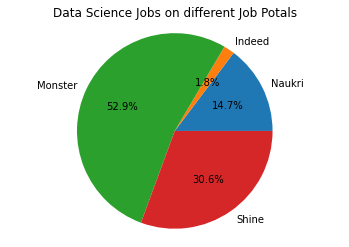

In [8]:
# plotting the pie chart  
import matplotlib.pyplot as plt
websites = 'Naukri','Indeed','Monster','Shine'
plt.pie(job_counts,labels=websites,autopct='%1.1f%%')
plt.title('Data Science Jobs on different Job Potals')
plt.axis('equal')
plt.show()